<a href="https://colab.research.google.com/github/Shawnequa/Global-Population-Growth-2024/blob/main/Global_Population_Growth_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

Import necessary libraries for data manipulation (pandas, numpy), visualization (matplotlib.pyplot, seaborn), and machine learning (sklearn modules).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

2. Data Ingestion

Read the dataset from a CSV file into a DataFrame df.

In [30]:
df = pd.read_csv('/content/global_population_growth_2024.csv')

3. Set Display Options

Adjust pandas display options to view more columns and rows.

In [31]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 40)

4. Initial Inspection & Data Cleansing

Check data types of each column and identify non-numeric values in numeric columns. You also display the first few rows of the DataFrame.

In [ ]:
# Check the data types of each column
print(df.dtypes)

# Check for any non-numeric values in numeric columns
for col in df.columns:
    print(f"Column '{col}' has non-numeric data: {df[col].apply(lambda x: isinstance(x, str)).any()}")

# Display the first few rows of the DataFrame
print(df.head())

In [33]:
df_cleaned = df.apply(pd.to_numeric, errors='coerce')
df_cleaned = df_cleaned.dropna()

In [34]:
df.isna().sum()

,0
City,0
Country,0
Population_2023,0
Growth_Rate (%),0
Population_2024,0


5. Data Exploration - Basic Statistics

Display basic statistics for the DataFrame.

In [35]:
print(df.describe())

       Population_2023  Growth_Rate (%)  Population_2024
count     1.000000e+03      1000.000000     1.000000e+03
mean      1.555745e+07         2.738825     1.598217e+07
std       8.188922e+06         1.296754     8.415373e+06
min       1.076218e+06         0.507043     1.082482e+06
25%       8.767388e+06         1.606459     8.914246e+06
50%       1.538409e+07         2.782955     1.589204e+07
75%       2.265558e+07         3.819846     2.322489e+07
max       2.999429e+07         4.997362     3.122415e+07


6. Encoding Categorical Data

Convert categorical variables into dummy/indicator variables.

In [37]:
df_encoded = pd.get_dummies(df, drop_first=True)

7. Double Bar Plot

Create a bar chart to compare populations in 2023 and 2024 for various cities.

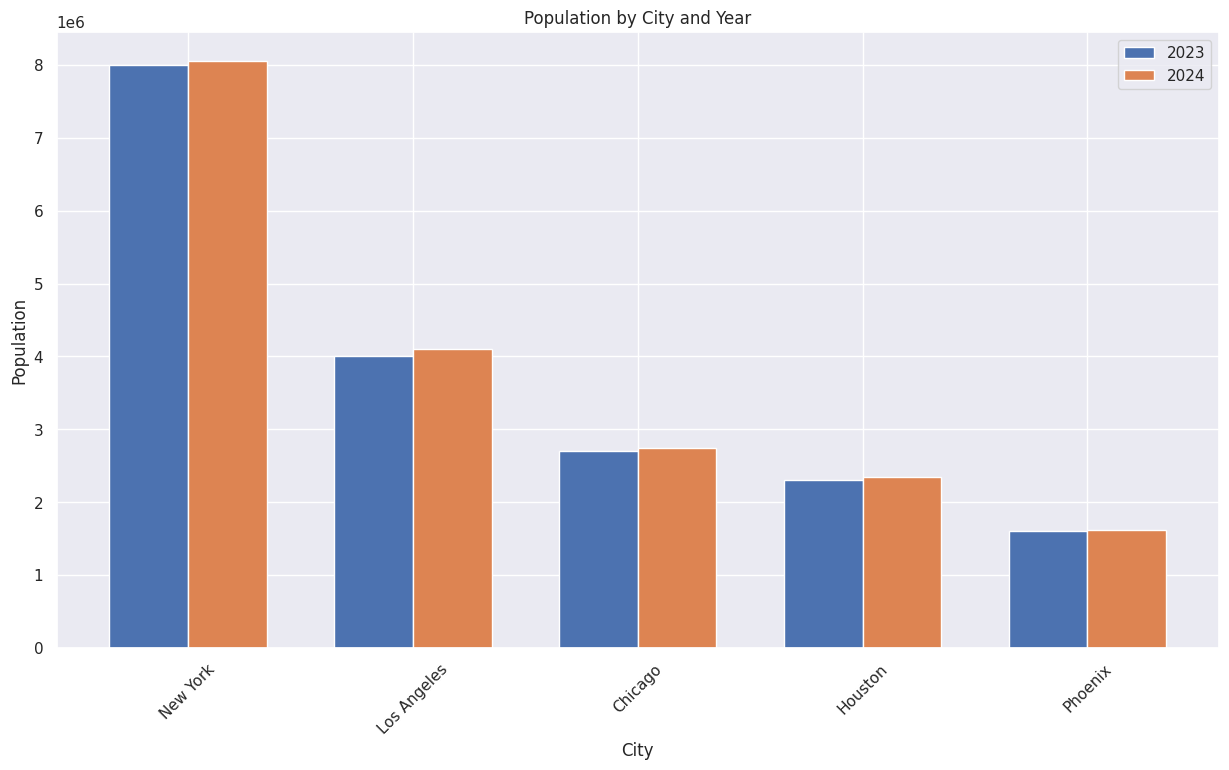

In [44]:
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
population_2023 = [8000000, 4000000, 2700000, 2300000, 1600000]
population_2024 = [8050000, 4100000, 2750000, 2350000, 1620000]

x = np.arange(len(cities))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, population_2023, width, label='2023')
rects2 = ax.bar(x + width/2, population_2024, width, label='2024')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('City')
ax.set_ylabel('Population')
ax.set_title('Population by City and Year')
ax.set_xticks(x)
ax.set_xticklabels(cities)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

8. Clustering Analysis Scaling the Data

Scale the numeric data and combine it with the non-numeric data, then display the combined DataFrame.

In [46]:
# Separate numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Scale the numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

# Convert the scaled data back to a DataFrame (optional)
df_scaled = pd.DataFrame(df_scaled, columns=numeric_df.columns)

# Combine scaled numeric data with the non-numeric data if needed
df_combined = pd.concat([df[['City']], df_scaled], axis=1)

print(df_combined)


            City  Population_2023  Growth_Rate (%)  Population_2024
0    Los Angeles         1.378046        -1.103499         1.332220
1       Shanghai        -0.474497        -0.902612        -0.490448
2          Cairo         0.811780         1.645278         0.868020
3         Mumbai        -0.503042        -1.099007        -0.522123
4    Los Angeles        -1.437419         1.239026        -1.429644
..           ...              ...              ...              ...
995       Sydney         1.667784        -0.039983         1.665717
996       Sydney        -0.433815         0.276656        -0.428422
997        Cairo         0.786094        -1.575489         0.732665
998        Tokyo        -0.318469        -1.300288        -0.344174
999       Moscow        -1.624897         0.212225        -1.623577

[1000 rows x 4 columns]


Elbow Method for Optimal Clusters

Use the Elbow Method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WSS).

In [ ]:
wss = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(df_scaled)
    wss.append(km.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 10), wss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

Silhouette Scores for Different Clusters

Calculate and plot silhouette scores to evaluate cluster quality for different numbers of clusters.

In [ ]:
silhouette_coefficients = []

for i in range(2, 10):
    km = KMeans(n_clusters=i, max_iter=100, random_state=42)
    km.fit(df_scaled)
    score = silhouette_score(df_scaled, km.labels_)
    silhouette_coefficients.append(score)

# Plotting the silhouette scores for different numbers of clusters
plt.plot(range(2, 10), silhouette_coefficients, marker='o')
plt.xticks(range(2, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficients for Different Cluster Sizes')
plt.show()


Dimensionality Reduction using PCA

Apply Principal Component Analysis (PCA) for dimensionality reduction.

In [53]:
pca = PCA()
X = pca.fit_transform(df_scaled)

KMean Clustering with Chosen Number of Clusters

Perform KMeans clustering with the chosen number of clusters and obtain cluster labels.

In [54]:
km = KMeans(n_clusters=3)
label = km.fit_predict(X)
unique_labels = np.unique(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizing Clusters

Visualize the clusters in a scatter plot using the PCA-transformed data.

In [ ]:
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i)

plt.legend()
plt.title('Global Population Growth 2024')
plt.show()